In [31]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go

In [32]:
data = pd.read_pickle('AgesAndHeights.pkl')
data.head()

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>]], dtype=object)

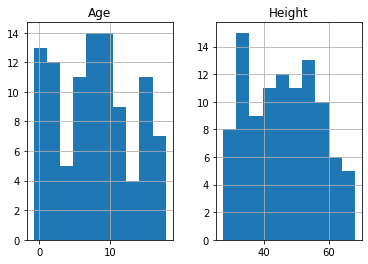

In [33]:
data.hist()

In [34]:
ages = data['Age']
heights = data['Height']
type(ages)

pandas.core.series.Series

In [35]:
data = data[ages>0]
ages = data['Age']
heights = data['Height']

In [36]:
fig = px.scatter(x=ages, y=heights, title='Heights vs Ages', labels={'x': 'Ages(inches)',
                                                                    'y': 'Heights'})
fig.show()

In [37]:
age = np.array(ages).reshape(len(ages), 1)
ages.shape

(93,)

In [38]:
heights = np.array(heights)

In [39]:
dp = np.linspace(0, 18, 19).reshape(19, 1)
reg = LinearRegression()
model = reg.fit(age, heights)

In [40]:
predictions = model.predict(dp)

In [44]:
predictions

array([29.96185761, 31.96327451, 33.96469141, 35.96610831, 37.96752521,
       39.96894211, 41.97035901, 43.97177591, 45.97319281, 47.9746097 ,
       49.9760266 , 51.9774435 , 53.9788604 , 55.9802773 , 57.9816942 ,
       59.9831111 , 61.984528  , 63.9859449 , 65.9873618 ])

In [45]:
fig = px.scatter(x=ages, y=heights, title='Heights vs Ages', labels={'x': 'Ages(inches)',
                                                                    'y': 'Heights'})
fig.add_trace(go.Scatter(x=dp.reshape(19), y=predictions, mode='lines', name='Model'))
fig.show()

In [46]:
from joblib import dump, load

In [48]:
dump(model, '../app/model.joblib')

['../app/model.joblib']